In [64]:
from sklearn import preprocessing as ppp
from sklearn.model_selection import train_test_split
import scipy.sparse as sp
import numpy as np
import random
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
import time
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import mlxtend
import numpy as np
import pandas as pd

In [65]:
#데이터셋 생성
# 우유A 양상추B 기저귀C 주스D 맥주E


data = np.array([
    ['A', 'B', 'C'],
    ['B', 'C', 'E'],
    ['A', 'B', 'C', 'E'],
    ['B', 'E']
])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


#### Apriori Algorithm

In [66]:
from mlxtend.preprocessing import TransactionEncoder

In [67]:
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,A,B,C,E
0,True,True,True,False
1,False,True,True,True
2,True,True,True,True
3,False,True,False,True


In [68]:
%%time 
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.5, use_colnames=True)

CPU times: user 8.18 ms, sys: 4.06 ms, total: 12.2 ms
Wall time: 25 ms


,support,itemsets
0,0.50,(A)
1,1.00,(B)
2,0.75,(C)
3,0.75,(E)
4,0.50,"(A, B)"
5,0.50,"(A, C)"
6,0.75,"(C, B)"
7,0.75,"(E, B)"
8,0.50,"(E, C)"
9,0.50,"(C, A, B)"


#### FP-Growth Algorithm

In [69]:
from mlxtend.preprocessing import TransactionEncoder

In [70]:
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,A,B,C,E
0,True,True,True,False
1,False,True,True,True
2,True,True,True,True
3,False,True,False,True


In [71]:
%%time 
from mlxtend.frequent_patterns import fpgrowth

fpgrowth(df, min_support=0.5, use_colnames=True)

CPU times: user 2.04 ms, sys: 0 ns, total: 2.04 ms
Wall time: 1.8 ms


,support,itemsets
0,1.00,(B)
1,0.75,(C)
2,0.50,(A)
3,0.75,(E)
4,0.75,"(C, B)"
5,0.50,"(E, C)"
6,0.50,"(C, B, E)"
7,0.50,"(A, C)"
8,0.50,"(A, B)"
9,0.50,"(C, A, B)"


In [72]:
from mlxtend.frequent_patterns import association_rules

In [73]:
association_rules(fpgrowth(df, min_support=0.1, use_colnames=True), metric='confidence', min_threshold=0.5, support_only=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(C),(B),0.75,1.00,0.75,1.000000,1.000000,0.0000,inf
1,(B),(C),1.00,0.75,0.75,0.750000,1.000000,0.0000,1.00
2,(E),(C),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75
3,(C),(E),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75
4,"(C, B)",(E),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75
5,"(E, C)",(B),0.50,1.00,0.50,1.000000,1.000000,0.0000,inf
6,"(E, B)",(C),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75
7,(C),"(E, B)",0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75
8,(B),"(E, C)",1.00,0.50,0.50,0.500000,1.000000,0.0000,1.00
9,(E),"(C, B)",0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
import os

In [86]:
# original rating data
raw_data = np.array([[4, np.NaN, np.NaN, 2, np.NaN ],
                [np.NaN, 5, np.NaN, 3, 1],
                [np.NaN, np.NaN, 3, 4, 4],
                [5, 2, 1, 2, np.NaN]])
user_num, item_num = raw_data.shape
latent_k = 3

#np.random.seed(4141)

X = np.random.normal(scale=1./latent_k, size=(user_num, latent_k))
Y = np.random.normal(scale=1./latent_k, size=(item_num, latent_k))


In [87]:
X = np.random.normal(scale=1./latent_k, size=(user_num, latent_k))
Y = np.random.normal(scale=1./latent_k, size=(item_num, latent_k))

In [91]:
Y.T

array([[ 0.1855684 ,  0.60394651,  0.65685723,  0.24202688, -0.2266571 ],
       [-0.31839767,  0.37288138, -0.04347289,  0.16462162, -0.18338114],
       [-0.38159811, -0.22793813, -0.0188598 , -0.26128756,  0.00746197]])

In [92]:
X @ Y.T

array([[-0.11254811, -0.1017116 , -0.07186635, -0.07822132,  0.01957929],
       [-0.06399175,  0.23480004,  0.26885289,  0.04820602, -0.11489314],
       [ 0.04887933,  0.24511832,  0.11567939,  0.13961186, -0.08417141],
       [-0.09357404, -0.12558656, -0.15124502, -0.06227756,  0.03802207]])

In [94]:
from sklearn.metrics import mean_squared_error

def get_rmse(raw_data, X, Y, non_zeros):
    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(X, Y.T)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    raw_data_non_zeros = raw_data[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
      
    mse = mean_squared_error(raw_data_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

### iteration step :  0  rmse :  3.271698689472804
### iteration step :  50  rmse :  0.5807101443828643
### iteration step :  100  rmse :  0.18214232690830423
### iteration step :  150  rmse :  0.09383431840583815
### iteration step :  200  rmse :  0.060199422013415875
### iteration step :  250  rmse :  0.04289500863158748
### iteration step :  300  rmse :  0.032697888660916226
### iteration step :  350  rmse :  0.02630177615270153
### iteration step :  400  rmse :  0.022206692684498403
### iteration step :  450  rmse :  0.019584032625695143
### iteration step :  500  rmse :  0.01791532243255158
### iteration step :  550  rmse :  0.01685940549514744
### iteration step :  600  rmse :  0.016191481163998482
### iteration step :  650  rmse :  0.015766344660999066
### iteration step :  700  rmse :  0.015492291016782319
### iteration step :  750  rmse :  0.01531235391711345
### iteration step :  800  rmse :  0.01519144940686766
### iteration step :  850  rmse :  0.015107999634216506
### iter

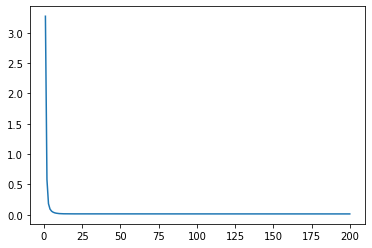

In [95]:
# R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장. 
non_zeros = [ (i, j, raw_data[i,j]) for i in range(user_num) for j in range(item_num) if raw_data[i,j] > 0 ]
# 아래 식과 똑같은 식임
# non_zeroes=[]
# for j in range(num_items) :
#     for i in range(num_users):
#         if R[i, j] > 0:
#             non_zeros
    
steps=10000
learning_rate=0.01
r_lambda=0.01
rmse_list = []
# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트. 
for step in range(steps):
    for i, j, r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값 구함
        e_ij = r - np.dot(X[i, :], Y[j, :].T)
        # Regularization을 반영한 SGD 업데이트 공식 적용
        X[i,:] = X[i,:] + learning_rate*(e_ij * Y[j, :] - r_lambda*X[i,:])
        Y[j,:] = Y[j,:] + learning_rate*(e_ij * X[i, :] - r_lambda*Y[j,:])

    rmse = get_rmse(raw_data, X, Y, non_zeros)
    if (step % 50) == 0 :
        rmse_list.append(rmse)
        print("### iteration step : ", step," rmse : ", rmse)
plt.plot(range(1,201), rmse_list)

In [96]:
pred_matrix = np.dot(X, Y.T)
print('predict matrix : \n', np.round(pred_matrix, 3))

predict matrix : 
 [[3.992 2.235 1.218 1.995 2.367]
 [1.987 4.979 2.402 2.988 1.011]
 [5.78  4.852 2.985 3.983 3.982]
 [4.975 1.995 1.009 2.    2.797]]


In [98]:
def matrix_factorization(raw_data, latent_k, steps=200, learning_rate=0.01, r_lambda = 0.01):
    user_num, item_num = raw_data.shape
    np.random.seed(4141)
    X = np.random.normal(scale=1./latent_k, size=(user_num, latent_k))
    Y = np.random.normal(scale=1./latent_k, size=(item_num, latent_k))
    
    break_count = 0
    non_zeros = [(i,j, raw_data[i,j]) for i in range(user_num) for j in range(item_num) if raw_data[i,j] > 0]
    
    for step in range(steps):
        for i, j, r in non_zeros:
            e_ij = r - np.dot(X[i, :], Y[j, :].T)
            
            X[i, :] = X[i,:] + learning_rate*(e_ij * Y[j, :] - r_lambda*X[i, :])
            Y[j, :] = Y[j,:] + learning_rate*(e_ij * X[i, :] - r_lambda*Y[j, :])
        
        rmse = get_rmse(raw_data, X, Y, non_zeros)
        if (step % 10) == 0:
            print("=====iteration step : ", step, "rmse", rmse)
    
    return X, Y
        

In [99]:
X, Y = matrix_factorization(raw_data, latent_k = 3, steps = 200, learning_rate = 0.01, r_lambda = 0.01)
pred_matrix = np.dot(X, Y.T)

=====iteration step :  0 rmse 3.2146278229053546
=====iteration step :  10 rmse 2.865850010873045
=====iteration step :  20 rmse 1.993686307230116
=====iteration step :  30 rmse 1.0276620490396489
=====iteration step :  40 rmse 0.5925110964719479
=====iteration step :  50 rmse 0.41384596000010193
=====iteration step :  60 rmse 0.3154788420666948
=====iteration step :  70 rmse 0.25129117908855103
=====iteration step :  80 rmse 0.20573812609289277
=====iteration step :  90 rmse 0.1714976868227991
=====iteration step :  100 rmse 0.1445908297905475
=====iteration step :  110 rmse 0.12276644939294312
=====iteration step :  120 rmse 0.10470906084852459
=====iteration step :  130 rmse 0.08960312452932685
=====iteration step :  140 rmse 0.07689965105834697
=====iteration step :  150 rmse 0.06619678574551839
=====iteration step :  160 rmse 0.05718039724460276
=====iteration step :  170 rmse 0.0495943779044854
=====iteration step :  180 rmse 0.043225009376968326
=====iteration step :  190 rmse 0

In [101]:
pred_matrix

array([[4.01989097, 1.68440105, 1.22882015, 1.92809119, 2.16028945],
       [0.57683234, 4.99042048, 1.85921439, 2.95699045, 1.02457235],
       [4.27955336, 4.47650881, 2.97137324, 4.01560945, 3.97042663],
       [4.95823665, 1.97585265, 1.01986855, 2.03128373, 1.83155397]])

In [147]:
df = pd.read_csv('/Linux/Data/recommendation/ml-100k.zip')
df

,user_id,item_id,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596
...,...,...,...,...
99995,880,476,3.0,880175444
99996,716,204,5.0,879795543
99997,276,1090,1.0,874795795
99998,13,225,2.0,882399156


In [148]:
moviematrix = df.pivot_table(index="user_id",columns="item_id",values='rating')

In [149]:
print(moviematrix, moviematrix.shape)

item_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                              ...   
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
2         4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5         4.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
939       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   5.0   NaN  ...   
940       NaN   NaN   NaN   2.0   NaN   NaN   4.0   5.0   3.0   NaN  ...   
941       5.0   NaN   NaN   NaN   NaN   NaN   4.0   NaN   NaN   NaN  ...   
942       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
943       NaN   5.0   NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN  ...   

item_id  16

In [150]:
# original rating data
raw_data = np.array([[4, np.NaN, np.NaN, 2, np.NaN ],
                [np.NaN, 5, np.NaN, 3, 1],
                [np.NaN, np.NaN, 3, 4, 4],
                [5, 2, 1, 2, np.NaN]])
user_num, item_num = raw_data.shape
latent_k = 3

#np.random.seed(4141)

X = np.random.normal(scale=1./latent_k, size=(user_num, latent_k))
Y = np.random.normal(scale=1./latent_k, size=(item_num, latent_k))


In [152]:
moviematrix.shape

(943, 1682)

In [154]:
user_num, item_num = movie_matrix.shape
latent_k = 50

X = np.random.normal(scale=1./latent_k, size=(user_num, latent_k))
Y = np.random.normal(scale=1./latent_k, size=(item_num, latent_k))

In [121]:
from sklearn.metrics import mean_squared_error

def get_rmse(movie_matrix, X, Y, non_zeros):
    error = 0
    full_pred_matrix = np.dot(X, Y.T)
    
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    movie_matrix_non_zeros = movie_matrix[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    
    mse = mean_squared_error(movie_matrix_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

In [156]:
pred_matrix = np.dot(X, Y.T)
print('predict matrix : \n', np.round(pred_matrix, 3))

predict matrix : 
 [[-0.001  0.     0.002 ...  0.003 -0.001 -0.006]
 [ 0.     0.002  0.002 ... -0.001 -0.     0.002]
 [-0.003 -0.002 -0.001 ... -0.001  0.004 -0.001]
 ...
 [ 0.006  0.001 -0.002 ... -0.003 -0.001 -0.001]
 [ 0.005  0.002 -0.002 ... -0.005 -0.004  0.005]
 [ 0.002 -0.001 -0.    ... -0.001 -0.006  0.001]]


In [159]:
train, test = train_test_split(df.values, test_size = 0.2, random_state=419)
train = pd.DataFrame(train, columns = df.columns)
test = pd.DataFrame(test, columns = df.columns)

In [160]:
print("Train Size  : ", len(train))
print("Test Size : ", len (test))

Train Size  :  80000
Test Size :  20000


In [165]:
le_user = ppp.LabelEncoder()
le_item = ppp.LabelEncoder()
train['user_id_idx'] = le_user.fit_transform(train['user_id'].values)
train['item_id_idx'] = le_item.fit_transform(train['item_id'].values)

In [166]:
train_user_ids = train['user_id'].unique()
train_item_ids = train['item_id'].unique()

In [167]:
print(len(train_user_ids), len(train_item_ids))

943 1660


In [168]:
test = test[(test['user_id'].isin(train_user_ids)) & (test['item_id'].isin(train_item_ids))]
print(len(test))

19975


In [169]:
test['user_id_idx'] = le_user.transform(test['user_id'].values)
test['item_id_idx'] = le_item.transform(test['item_id'].values)

In [170]:
n_users = train['user_id_idx'].nunique()
n_items = train['item_id_idx'].nunique()
print("Number of Unique Users : ", n_users)
print("Number of unique Items : ", n_items)

Number of Unique Users :  943
Number of unique Items :  1660


In [171]:
user_num, item_num = movie_matrix.shape
latent_k = 50

X = np.random.normal(scale=1./latent_k, size=(user_num, latent_k))
Y = np.random.normal(scale=1./latent_k, size=(item_num, latent_k))

In [172]:
def get_rmse(movie_matrix, X, Y, non_zeros):
    error = 0
    full_pred_matrix = np.dot(X, Y.T)
    
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    movie_matrix_non_zeros = movie_matrix[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    
    mse = mean_squared_error(movie_matrix_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

In [183]:
torch.matmul(x_torch, y_torch.T).shape

torch.Size([943, 1682])

In [319]:
torch.matmul(x_torch, y_torch.T)

tensor([[4.9435, 3.0802, 3.6955,  ..., 1.0778, 1.6759, 2.7843],
        [3.7993, 3.6894, 3.0607,  ..., 1.0362, 2.2115, 2.7311],
        [2.9624, 2.7220, 4.2034,  ..., 1.0090, 0.8372, 1.8126],
        ...,
        [4.9478, 3.9631, 2.3471,  ..., 1.2615, 1.5835, 2.4601],
        [3.4425, 3.8860, 4.2708,  ..., 1.1751, 1.8658, 2.1853],
        [3.1494, 4.7582, 2.9639,  ..., 1.3013, 1.9389, 2.3040]],
       dtype=torch.float64)

In [174]:
def get_rmse(movie_matrix, X, Y, non_zeros):
   # error = 0
    full_pred_matrix = torch.matmul(x_torch, y_torch.T)
    
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    movie_matrix_non_zeros = movie_matrix[x_non_zero_ind, y_non_zero_ind]
    movie_matrix_non_zeros = torch.from_numpy(movie_matrix_non_zeros)

    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    
    mse = (full_pred_matrix_non_zeros - movie_matrix_non_zeros).pow(2).sum()
    rmse = torch.sqrt(mse)
    
    return rmse

In [239]:
get_rmse(movie_matrix, x_torch, y_torch, non_zeros)

tensor(792.8683, dtype=torch.float64)

In [178]:
full_pred_matrix = torch.matmul(x_torch, y_torch.T)
x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
movie_matrix_non_zeros = movie_matrix[x_non_zero_ind, y_non_zero_ind]
movie_matrix_non_zeros = torch.from_numpy(movie_matrix_non_zeros)
full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
mse = (full_pred_matrix_non_zeros - movie_matrix_non_zeros).pow(2).sum()
mse

tensor(9282.3454, dtype=torch.float64)